<a href="https://colab.research.google.com/github/FM-Man/Power-Consumpsion-Prediction-With-Weather-Data/blob/main/LinearRegressionNotNormalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Correlation Matrix Calculation

###For Barisal in 2019

<ipython-input-22-bcda284f7463>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


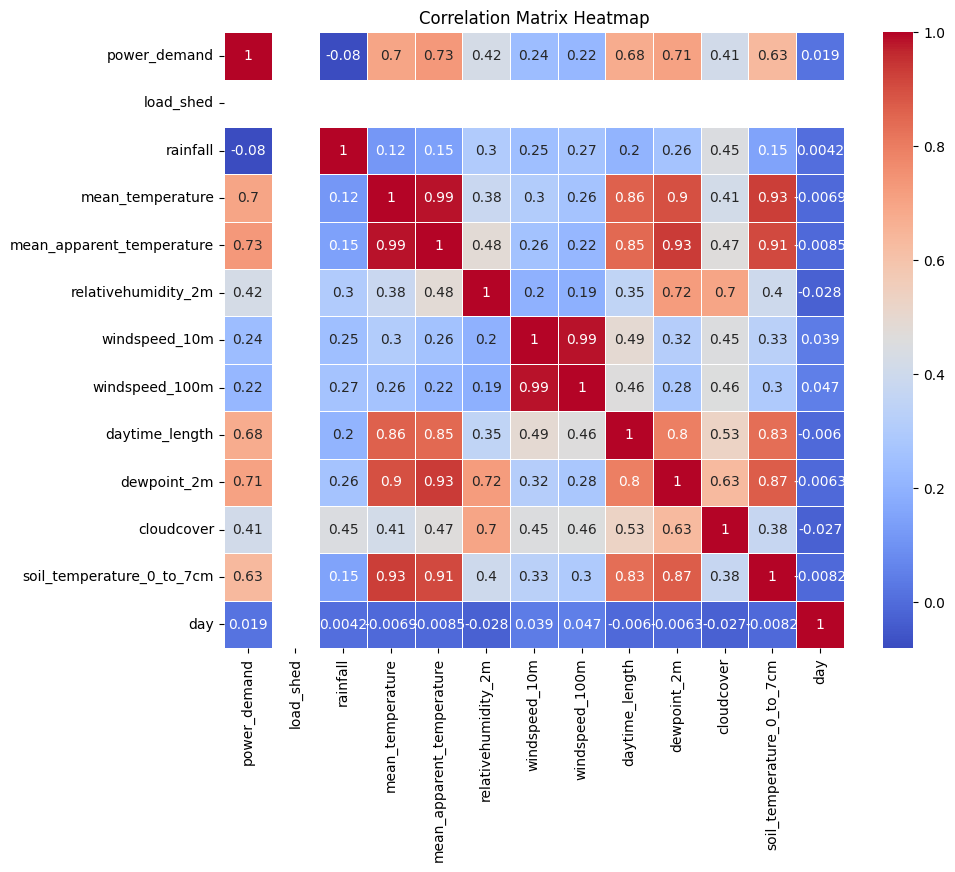

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as date

# Load your CSV file into a Pandas DataFrame
file_path = "/content/drive/MyDrive/dataset/barishal2019additionalcolumn.csv"  # Change this to your CSV file's path
df = pd.read_csv(file_path)

date_array = df['date']
day_array = []
for data in date_array:
  date_obj = date.strptime(data, '%Y-%m-%d')
  day=date_obj.strftime("%A")
  if day=='Friday' or day=='Saturday' :
    day_value = 0
  else:
    day_value = 1
  day_array.append(day_value)

df['day'] = day_array
df.to_csv('/content/drive/MyDrive/dataset/barishal2019withday.csv', index=False)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



##Observations
* For powerconsumption, Barishal has no correlation with ***rainfall*** and the day being ***Weekend***
* ***Wind Speed*** Has very little effect at every altitude
* ***Relative Humidity*** and ***Cloud cover*** has small correlation
* Meanwhile, ***Mean Temperature***, ***Mean Apparent Temperature***, ***Soil Temperature***, ***day time length*** and ***dewpoint*** has Strong correlations



#Ordinery Least Squared Regression
###For Barisal in 2019
##Independent Variables
* ***Mean Temperature*** : As both temperature and apparent temperature both has strong correlations in between themselves, so we only picked one
* ***Relative Humidity***
* ***Daytime Length***
* ***Dewpoint***
* ***Soil Temperature***

In [ ]:
import numpy as np
import statsmodels.api as sm



# Define your independent variables (X) and dependent variable (Y)
X = df[['mean_temperature', 'relativehumidity_2m', 'daytime_length','dewpoint_2m','cloudcover','soil_temperature_0_to_7cm']]
Y = df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     94.01
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           4.00e-70
Time:                        21:24:53   Log-Likelihood:                -2654.1
No. Observations:                 360   AIC:                             5322.
Df Residuals:                     353   BIC:                             5349.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##Observations
* p values are good for everyone except soil temperature
* R squared value is very good for the dataset being only weather data
* The const coeeficient signifies that hypotheticaly if every variables were zero that would mean Barisal is consuming 2314 MW energy while barishal actually consumes only around 400-500 MW energy in total. So thera can be little to no interpretation of this value.
* Same is for almost every other coeeficient. Although Mean temperature is being shown positively correlated, Relative_humidity, Daytime Length and soil temperature is being shown as negatively correlated. But from the correlation Matrix We can see that they are positively correlated with temperature. so there is confusing interpretation here too.

##New Regression
without cloud cover as it has the lowest correlation out of all the dependent variables

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = df[['mean_temperature', 'relativehumidity_2m', 'daytime_length','dewpoint_2m','soil_temperature_0_to_7cm']]
Y = df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     110.8
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           3.41e-70
Time:                        21:25:08   Log-Likelihood:                -2656.4
No. Observations:                 360   AIC:                             5325.
Df Residuals:                     354   BIC:                             5348.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##Observation
* R Squared doesn't change that much
* P value of soil temperature is still horrendous
*The coeeficients have no interpretions yet

##New Regression
Drop Relative Humidity as it is next least correlated

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = df[['mean_temperature',  'daytime_length','dewpoint_2m','soil_temperature_0_to_7cm']]
Y = df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     135.8
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.93e-70
Time:                        21:25:25   Log-Likelihood:                -2658.8
No. Observations:                 360   AIC:                             5328.
Df Residuals:                     355   BIC:                             5347.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##Observations
* R squared value doesnt drop significantly
* P values haven't improved
* Coeeficient of the daytime length and the constant is still not intuaitive

In [ ]:
X = df[['daytime_length']]
Y = df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     183.2
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           5.41e-34
Time:                        21:26:32   Log-Likelihood:                -2751.5
No. Observations:                 360   AIC:                             5507.
Df Residuals:                     358   BIC:                             5515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -828.5376    321.289     -2.

# **DHAKA STARTS HERE**
-------------------
# Correlation Matrix
### For Dhaka 2019

<ipython-input-23-f79247602d0b>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


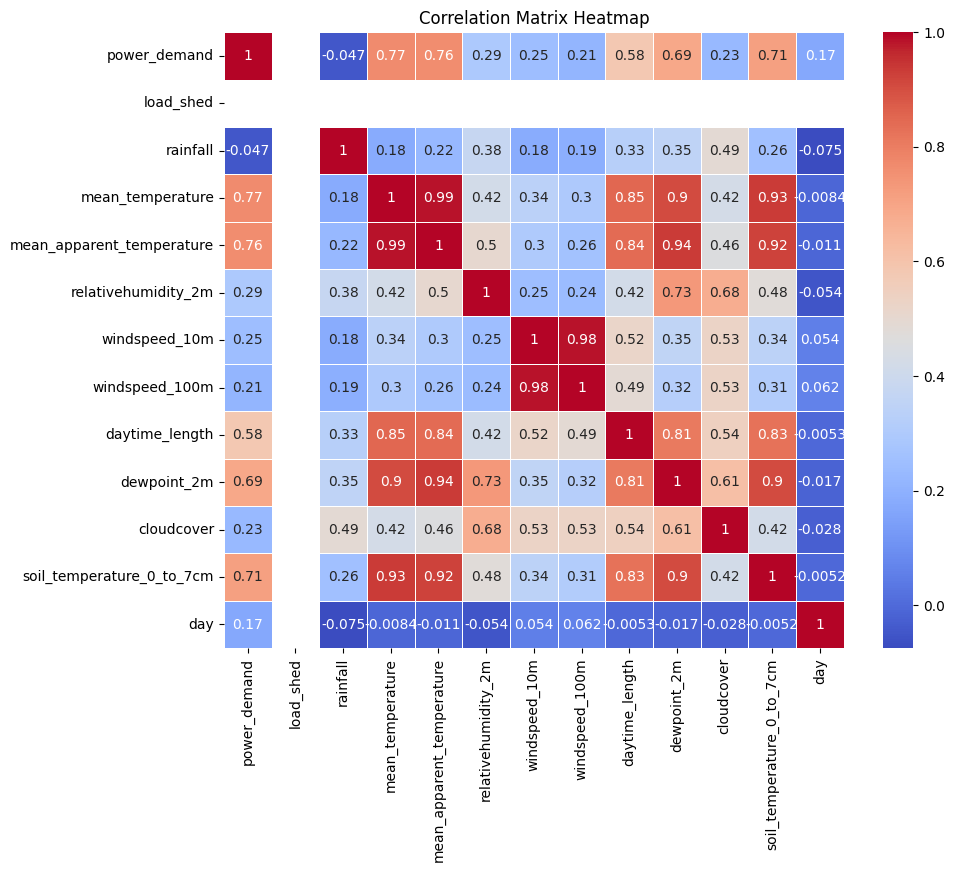

In [ ]:
# Load your CSV file into a Pandas DataFrame
file_path = "/content/drive/MyDrive/dataset/dhaka2019additionalcolumn.csv"  # Change this to your CSV file's path
df = pd.read_csv(file_path)

date_array = df['date']
day_array = []
for data in date_array:
  date_obj = date.strptime(data, '%Y-%m-%d')
  day=date_obj.strftime("%A")
  if day=='Friday' or day=='Saturday' :
    day_value = 0
  else:
    day_value = 1
  day_array.append(day_value)

df['day'] = day_array
df.to_csv('/content/drive/MyDrive/dataset/dhaka2019withday.csv', index=False)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



##Observations
* Windspeed, Rainfall, Dewpoint and Mean Temperature has no change in correlation compared with barishal
* Relative Humidity, Cloud Cover, Daytime Length are significantly less correlated
* Weekends and soil temperature is more correlated

#OLS Regression
##Independent Variables
* All the variables :3

In [ ]:
# Define your independent variables (X) and dependent variable (Y)
X = df[['rainfall','mean_temperature','mean_apparent_temperature','relativehumidity_2m','windspeed_10m','windspeed_100m','daytime_length','dewpoint_2m','cloudcover','soil_temperature_0_to_7cm','day']]
Y = df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     67.33
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.93e-79
Time:                        21:13:57   Log-Likelihood:                -2620.7
No. Observations:                 360   AIC:                             5265.
Df Residuals:                     348   BIC:                             5312.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##Observations
* R squared is good while coeeficients and p values are still horrendous

In [ ]:
X = df[['rainfall','mean_temperature','mean_apparent_temperature','relativehumidity_2m','windspeed_10m','windspeed_100m','daytime_length','dewpoint_2m','cloudcover','soil_temperature_0_to_7cm','day']]
Y = df['power_demand']

X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           power_demand   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     67.33
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.93e-79
Time:                        21:18:04   Log-Likelihood:                -2620.7
No. Observations:                 360   AIC:                             5265.
Df Residuals:                     348   BIC:                             5312.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#***CONCLUSION***
----------------
Dropping some variables drops the R squared but improves the p values. We think it is due to the data not being normalized